In [1]:
import pandas as pd
import numpy as np

In [23]:
data = pd.read_csv("Pokemon.csv", index_col='#')

data.head(5)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [14]:
data.Lengendary = data.Legendary.replace({True : 1, False : 0}, inplace = True)

data.head(5)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,0


In [15]:
data.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,0.08125
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,0.27339
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,0.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,0.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,0.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,0.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000,1.00000


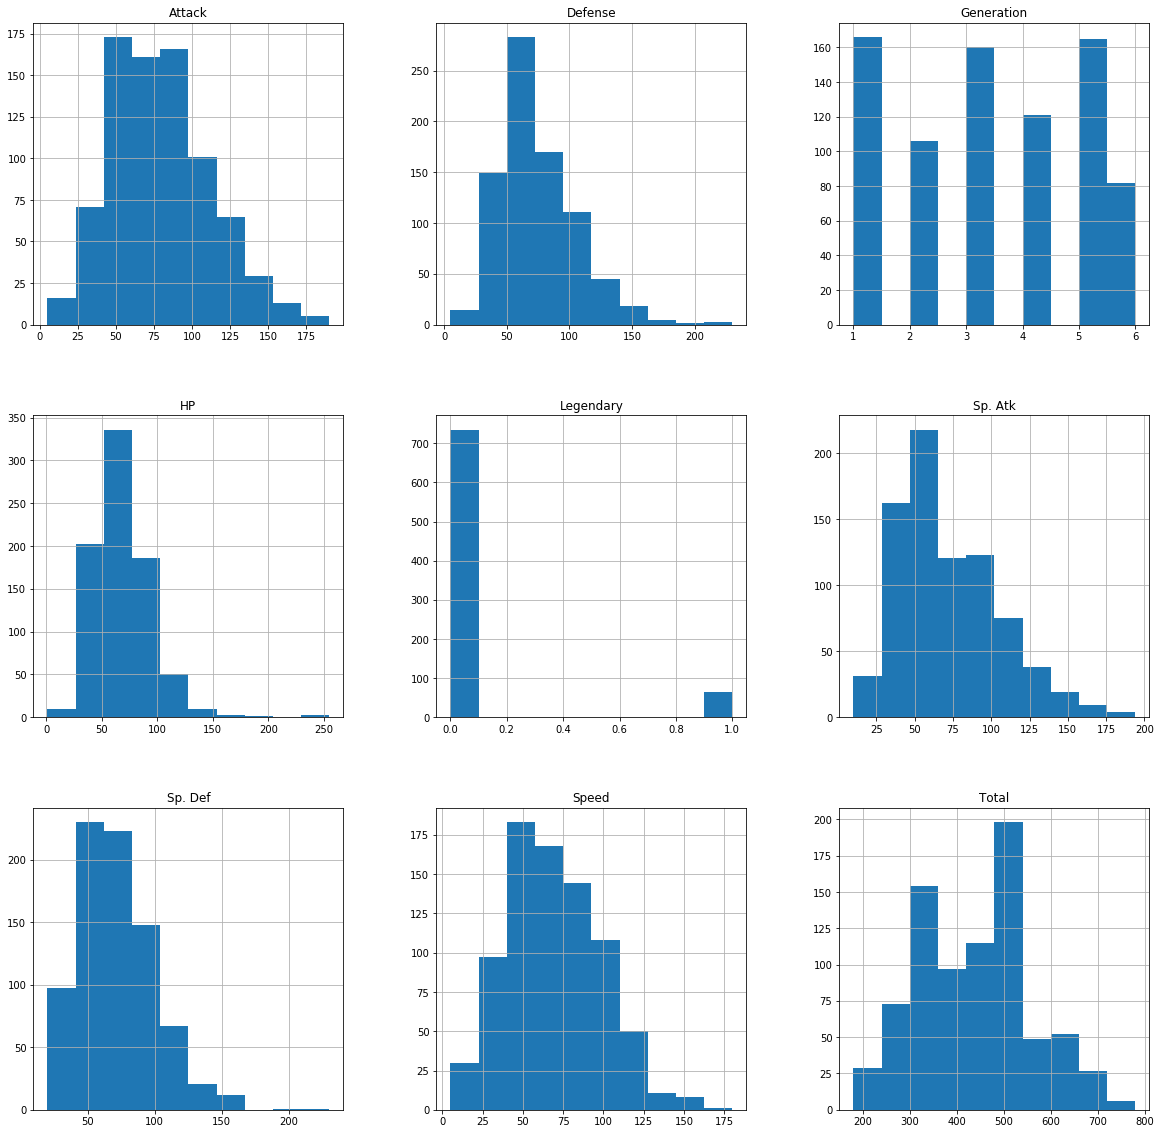

In [16]:
# distribution
p = data.hist(figsize = (20,20))


In [22]:
type_1_list = list(data['Type 1'].value_counts().index)
type_2_list = list(data['Type 2'].value_counts().index)

In [29]:
# 提取屬性成為新欄位
dummy_type_1 = pd.get_dummies(data['Type 1'])
dummy_type_2 = pd.get_dummies(data['Type 2'])

# 屬性結合
dummy_final = pd.DataFrame(index = data.index)
for column_name in type_2_list:
    dummy_final[column_name] = dummy_type_1[column_name] + dummy_type_2[column_name]
    
dummy_final.head()

,Flying,Ground,Poison,Psychic,Fighting,Grass,Fairy,Steel,Dark,Dragon,Ice,Water,Rock,Ghost,Fire,Electric,Normal,Bug
#,,,,,,,,,,,,,,,,,,
1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [34]:
poke_data_new = pd.concat([data, dummy_final], axis = 1)
poke_data_new.drop(['Type 1','Type 2'],axis=1,inplace=True)
poke_data_new.head(5)

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,...,Dark,Dragon,Ice,Water,Rock,Ghost,Fire,Electric,Normal,Bug
#,,,,,,,,,,,,,,,,,,,,,
1,Bulbasaur,318,45,49,49,65,65,45,1,False,...,0,0,0,0,0,0,0,0,0,0
2,Ivysaur,405,60,62,63,80,80,60,1,False,...,0,0,0,0,0,0,0,0,0,0
3,Venusaur,525,80,82,83,100,100,80,1,False,...,0,0,0,0,0,0,0,0,0,0
3,VenusaurMega Venusaur,625,80,100,123,122,120,80,1,False,...,0,0,0,0,0,0,0,0,0,0
4,Charmander,309,39,52,43,60,50,65,1,False,...,0,0,0,0,0,0,1,0,0,0


In [36]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
columns_list = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
numerical =  pd.DataFrame(sc_X.fit_transform(poke_data_new[columns_list]),
                          columns = columns_list,
                          index = poke_data_new.index)

# numerical
poke_clean_standard = poke_data_new.copy(deep=True)
poke_clean_standard[columns_list] = numerical[columns_list]
poke_clean_standard.head()

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,...,Dark,Dragon,Ice,Water,Rock,Ghost,Fire,Electric,Normal,Bug
#,,,,,,,,,,,,,,,,,,,,,
1,Bulbasaur,-0.976765,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503,1,False,...,0,0,0,0,0,0,0,0,0,0
2,Ivysaur,-0.251088,-0.362822,-0.524130,-0.347917,0.219560,0.291156,-0.285015,1,False,...,0,0,0,0,0,0,0,0,0,0
3,Venusaur,0.749845,0.420917,0.092448,0.293849,0.831146,1.010283,0.403635,1,False,...,0,0,0,0,0,0,0,0,0,0
3,VenusaurMega Venusaur,1.583957,0.420917,0.647369,1.577381,1.503891,1.729409,0.403635,1,False,...,0,0,0,0,0,0,0,0,0,0
4,Charmander,-1.051836,-1.185748,-0.832419,-0.989683,-0.392027,-0.787533,-0.112853,1,False,...,0,0,0,0,0,0,1,0,0,0


In [38]:
x = poke_clean_standard.drop(["Legendary", "Name"],axis=1)
y = poke_clean_standard.Legendary

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,random_state = 2,test_size=0.4,stratify=y)

from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [40]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [47]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 95.625 % and k = [7]


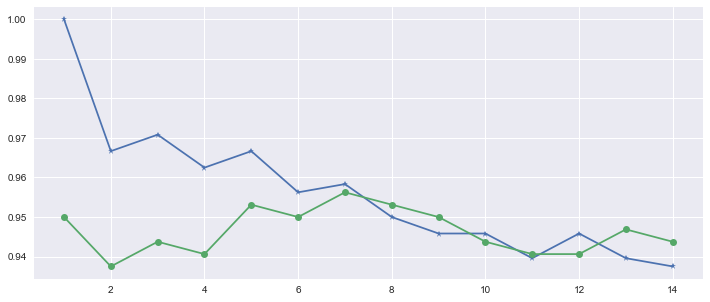

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize=(12,5))
p = plt.plot(range(1,15),train_scores,marker='*',label='Train Score')
p = plt.plot(range(1,15), test_scores, marker='o',label='Test Score')


In [52]:
#Setup a knn classifier with k neighbors
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(7)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.95625

In [67]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 5)
clf = clf.fit(X_train, y_train)

y_predict = clf.predict(X_test)
clf.score(X_test, y_predict)

1.0

In [61]:
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LogisticRegression

imp = Imputer()
imp.fit(X_train)
imp_train_data = imp.transform(X_train)
imp_test_data = imp.transform(X_test)

lr = LogisticRegression().fit(imp_train_data, y_train)
lr.score(X_test, y_test)

0.934375